In [118]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from pydataset import data
# for preparation state
from sklearn.model_selection import train_test_split
import prepare
import acquire
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [3]:
# *************************************  connection url **********************************************

# Create helper function to get the necessary connection url.
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, username, password
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'


In [ ]:
# acquire data

In [ ]:
#acquire data for the first time
def get_new_telco_churn():
    '''
    This function reads in the telco_churn data from the Codeup db
    and returns a pandas DataFrame with all columns and joined with other tables.
    '''
    sql_query = '''
    SELECT * FROM customers
    JOIN contract_types USING (contract_type_id)
    JOIN internet_service_types USING (internet_service_type_id)
    JOIN payment_types USING (payment_type_id)
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))


In [ ]:
#acquire data 
def get_telco_churn():
    '''
    This function reads in telco_churn data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco_churn.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('telco_churn.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = get_new_telco_churn()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_churn.csv')
        
    return df

In [ ]:
#acquire data with my function
df= get_telco_churn()

In [ ]:
# check the information before preparation process
df.head()

In [ ]:
df.shape

# preparation 

In [ ]:
#check the type of the columns

df.info()

In [ ]:
#checking the type of  the columns. I notice total_charges is an object type


In [ ]:
#we cannot conver total_charges to float because there are ' '
#df['total_charges'].astype('float')

In [ ]:
#take a look at the rows with space
df['total_charges'][df['total_charges']== ' ']

In [ ]:
#we will replace space with '0' for only these columns
df['total_charges'][df['total_charges']== ' ']= df['total_charges'][df['total_charges']== ' '].replace(' ', '0')

In [ ]:
#checking if we replace it
df['total_charges'][df['total_charges']== ' ']

In [ ]:
#in order to conver total_charges to float, I need will add '0' to ' '
#df['total_charges'] = df['total_charges'] + '0'

In [ ]:
#convert to a float type
df['total_charges'] = df['total_charges'].astype('float')
df['total_charges'].dtype

In [ ]:
#checking nulls
df.isnull().sum()

df.isna().sum()

In [ ]:
#checking for duplicates
df.duplicated().sum()

In [ ]:
# individual variable distributions are plotted
plt.hist(df['gender'])
plt.show()

In [ ]:
# plot each column, exclude the first 4 columns
cols =df.columns.to_list()
cols

In [ ]:
# plot each column, exclude the first 4 columns
cols[4:]

In [ ]:
for col in cols[4:]:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#make a function
def distribution (df):
    cols =df.columns.to_list()
    for col in cols[4:]:
        plt.hist(df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
#checking again
df.info()

In [ ]:
#check the columns yes?no columns
df.head(1)

In [ ]:
#all the columns that have yes/no
col_list = ['partner', 'dependents','phone_service', 'paperless_billing','churn' ]

In [ ]:
#check all the values for these columns
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('__________________________')

In [ ]:
#checking if we can change no/yes to 0/1 and compare above
(df.churn == 'Yes').astype(int).value_counts()

In [ ]:
#using this code we can change it
(df[col_list] == 'Yes').astype(int)

In [ ]:
# changgin the value no/yes to 0/1
df[col_list] = (df[col_list] == 'Yes').astype(int)

In [ ]:
df[col_list].head()

In [ ]:
#check all the values for these columns to make sure it is correct
for col in col_list:
    print(col)
    print(df[col].value_counts(dropna = False))
    print('__________________________')

In [ ]:
df.info()

In [ ]:
#selecting all the columns that are object type
df.select_dtypes('object').columns

In [ ]:
#make a list of these type of columns , excluding 'customer_id'
list(df.select_dtypes('object').columns)[1:]

In [ ]:
#checking the value of each columns
col_list = list(df.select_dtypes('object').columns)[1:]
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('__________________________')

In [ ]:
#the columns 'online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies'
#have the same values 
col_list[2:8]

In [ ]:
#create a dicttionary that have the values that we are going to change
var= {
    'No':0,
    'Yes':1,
    'No internet service':3
}

In [ ]:
#using .map and for loop to change the values of each column on the list

In [ ]:
for col in col_list[2:8]:
      df[col]= df[col].map(var) 


In [ ]:
#check the changes
df[col_list[2:8]].head()

In [ ]:
#checking again the list of columns as 'object type'
df.select_dtypes('object').columns

In [ ]:
#I decide to convert this column to a values
df['multiple_lines'].unique()

In [ ]:
#replace the values for numeric
df.replace({'multiple_lines': {'No':1, 'Yes':2, 'No phone service': 0}}, inplace=True)


In [ ]:
df['multiple_lines'].unique()

In [ ]:
# make a list of the columns that are object type , exclude "customer_id"
col_list = list(df.select_dtypes('object').columns)[1:]

In [ ]:
col_list

In [ ]:
#create a dummy df of each column on the list
for col in col_list:
    dummy_df = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# drop the columns that we already use to create dummy_df
df.drop(columns=col_list, inplace=True)

In [ ]:
df.info()

In [ ]:
#there is a column named None, that means no internet service. 
#0 = false (no internet service)
#1 = true (no internet service)

df['None'].value_counts()

In [ ]:
# I will rename the column as has_internet
df.rename(columns={'None':'has_internet'}, inplace= True )

In [ ]:
#checking the change
df['has_internet'].value_counts()

In [ ]:
#to match the values we want 
#0  = false (has internet)
#1 = true (has_internet)
df['has_internet'] = df['has_internet'].replace({0: 1, 1: 0})

In [ ]:
df['has_internet'].value_counts()

In [ ]:
#creating my function

def clean_data(df):
    '''
    This function will drop payment_type_id', 'internet_service_type_id','contract_type_id', 
    convert all the columns that have yes/no to 0/1, 
    create dummy vars from 'gender', 'contract_type', 'internet_service_type', 'payment_type',
    change total_charges to a float type. 
    '''

    #clean data
    # conver total_charges to float
    df['total_charges'][df['total_charges']== ' ']= df['total_charges'][df['total_charges']== ' '].replace(' ', '0')
    df['total_charges'] = df['total_charges'].astype('float')
    
    #convert all the columns that have yes/no to 0/1
    col_list = ['partner', 'dependents','phone_service', 'paperless_billing','churn' ]
    df[col_list] = (df[col_list] == 'Yes').astype(int)
    
    #change columns to 0,1,2
    #getting a list of the  columns that I want to change
    col_list = list(df.select_dtypes('object').columns)[1:]
    #create a dicttionary to change the value
    var= {
        'No':0,
        'Yes':1,
        'No internet service':3
    }
    #use a for loop to change every column
    for col in col_list[2:8]:
      df[col]= df[col].map(var) 
    
    #replace the values of multiple_lines
    df.replace({'multiple_lines': {'No':1, 'Yes':2, 'No phone service': 0}}, inplace=True)
    
    #create a dummy df
    col_list = list(df.select_dtypes('object').columns)[1:]
    #create a dummy df
    for col in col_list:
        dummy_df = pd.get_dummies(df[col])
         ## Concatenate the dummy_df dataframe above with the original df
        df = pd.concat([df, dummy_df], axis=1)
    # drop the columns that we already use to create dummy_df
    df.drop(columns=col_list, inplace=True)
    
    #drop duplicates columns
    df.drop(columns = ['payment_type_id', 'internet_service_type_id','contract_type_id'], inplace=True)
    
    #  rename the column as has_internet
    df.rename(columns={'None':'has_internet'}, inplace= True )
    #changing the values to undestand better the meaning
    df['has_internet'] = df['has_internet'].replace({0: 1, 1: 0})
    # columns name change (remove space and -)
    df.columns = [col.lower().replace(' ', '_').replace('-','_') for col in df]
    df.columns
    return df


In [63]:
#acquire data
df = acquire.get_telco_churn()

In [64]:
df.shape

(7043, 24)

In [65]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [66]:
#use my clean function
df_clean = prepare.clean_data(df)

In [67]:
df_clean.shape

(7043, 29)

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   senior_citizen             7043 non-null   int64  
 2   partner                    7043 non-null   int64  
 3   dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   phone_service              7043 non-null   int64  
 6   multiple_lines             7043 non-null   int64  
 7   online_security            7043 non-null   int64  
 8   online_backup              7043 non-null   int64  
 9   device_protection          7043 non-null   int64  
 10  tech_support               7043 non-null   int64  
 11  streaming_tv               7043 non-null   int64  
 12  streaming_movies           7043 non-null   int64  
 13  paperless_billing          7043 non-null   int64

In [69]:
#calculate corr
df_corr = df_clean.corr()

In [70]:
df_corr

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
senior_citizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,-0.208709,-0.170002,-0.172926,-0.217566,...,0.138360,-0.046262,-0.117000,-0.108322,0.255338,0.182742,-0.016159,-0.024135,0.171718,-0.153477
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.056157,0.059540,0.064584,0.047420,...,-0.280865,0.082783,0.248091,-0.000851,0.000304,-0.000615,0.110706,0.082029,-0.083852,-0.095125
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,0.179614,0.161106,0.157003,0.173036,...,-0.231720,0.068368,0.204613,0.052010,-0.165818,-0.139812,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.085500,0.107643,0.107656,0.084902,...,-0.645561,0.202570,0.558533,0.013274,0.019720,0.039062,0.243510,0.233006,-0.208363,-0.233852
phone_service,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.146522,0.164540,0.156631,0.145215,...,-0.000742,-0.002791,0.003519,-0.452425,0.289999,-0.172209,0.007556,-0.007721,0.003062,-0.003319
multiple_lines,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,-0.074857,-0.034674,-0.038667,-0.074777,...,-0.068119,-0.004199,0.083266,-0.361806,0.414749,0.082560,0.061513,0.042590,0.065663,-0.176117
online_security,-0.208709,0.056157,0.179614,0.085500,0.146522,-0.074857,1.000000,0.884432,0.883200,0.902492,...,-0.327446,0.079135,0.305769,-0.278888,-0.505673,-0.930746,0.034667,0.045975,-0.345600,0.309323
online_backup,-0.170002,0.059540,0.161106,0.107643,0.164540,-0.034674,0.884432,1.000000,0.879558,0.885567,...,-0.304844,0.075950,0.282497,-0.346101,-0.434998,-0.923087,0.033914,0.038887,-0.308409,0.275201
device_protection,-0.172926,0.064584,0.157003,0.107656,0.156631,-0.038667,0.883200,0.879558,1.000000,0.892017,...,-0.330240,0.083700,0.304677,-0.350834,-0.430560,-0.923197,0.032260,0.047479,-0.309516,0.269657
tech_support,-0.217566,0.047420,0.173036,0.084902,0.145215,-0.074777,0.902492,0.885567,0.892017,1.000000,...,-0.343202,0.077659,0.325508,-0.281927,-0.502320,-0.930210,0.037218,0.046797,-0.347130,0.307727


In [71]:
df_corr.shape

(28, 28)

In [72]:
# I just wat to see churn
df_corr['churn']

senior_citizen               0.150889
partner                     -0.150448
dependents                  -0.164221
tenure                      -0.352229
phone_service                0.011942
multiple_lines               0.036310
online_security             -0.307989
online_backup               -0.280770
device_protection           -0.273951
tech_support                -0.306032
streaming_tv                -0.223123
streaming_movies            -0.224214
paperless_billing            0.191825
monthly_charges              0.193356
total_charges               -0.198324
churn                        1.000000
female                       0.008612
male                        -0.008612
month_to_month               0.405103
one_year                    -0.177820
two_year                    -0.302253
dsl                         -0.124214
fiber_optic                  0.308020
has_internet                 0.227890
bank_transfer_(automatic)   -0.117937
credit_card_(automatic)     -0.134302
electronic_c

In [73]:
df_corr['churn'].sort_values(ascending=False)

churn                        1.000000
month_to_month               0.405103
fiber_optic                  0.308020
electronic_check             0.301919
has_internet                 0.227890
monthly_charges              0.193356
paperless_billing            0.191825
senior_citizen               0.150889
multiple_lines               0.036310
phone_service                0.011942
female                       0.008612
male                        -0.008612
mailed_check                -0.091683
bank_transfer_(automatic)   -0.117937
dsl                         -0.124214
credit_card_(automatic)     -0.134302
partner                     -0.150448
dependents                  -0.164221
one_year                    -0.177820
total_charges               -0.198324
streaming_tv                -0.223123
streaming_movies            -0.224214
device_protection           -0.273951
online_backup               -0.280770
two_year                    -0.302253
tech_support                -0.306032
online_secur

In [74]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_service,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
multiple_lines,7043.0,1.325004,0.642730,0.00,1.00,1.00,2.00,2.00
online_security,7043.0,0.936675,1.165986,0.00,0.00,1.00,1.00,3.00
online_backup,7043.0,0.994889,1.142491,0.00,0.00,1.00,1.00,3.00
device_protection,7043.0,0.993895,1.142921,0.00,0.00,1.00,1.00,3.00
tech_support,7043.0,0.940224,1.164650,0.00,0.00,1.00,1.00,3.00


In [75]:
df_clean['female'].sum()

3488

In [76]:
df_clean['male'].sum()

3555

In [77]:
df_clean['senior_citizen'].sum()

1142

In [78]:
df_clean.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'female', 'male', 'month_to_month', 'one_year', 'two_year', 'dsl',
       'fiber_optic', 'has_internet', 'bank_transfer_(automatic)',
       'credit_card_(automatic)', 'electronic_check', 'mailed_check'],
      dtype='object')

In [79]:
df_clean

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
0,0016-QLJIS,0,1,1,65,1,2,1,1,1,...,0,0,1,1,0,1,0,0,0,1
1,0017-DINOC,0,0,0,54,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,0019-GFNTW,0,0,0,56,0,0,1,1,1,...,0,0,1,1,0,1,1,0,0,0
3,0056-EPFBG,0,1,1,20,0,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
4,0078-XZMHT,0,1,0,72,1,2,0,1,1,...,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,0,1,1,1,1,1,3,3,3,...,1,0,0,0,0,0,0,0,0,1
7039,9967-ATRFS,0,0,0,19,1,1,3,3,3,...,1,0,0,0,0,0,0,0,0,1
7040,9970-QBCDA,0,0,0,6,1,1,3,3,3,...,1,0,0,0,0,0,0,1,0,0
7041,9975-SKRNR,0,0,0,1,1,1,3,3,3,...,1,0,0,0,0,0,0,0,0,1


## Split

In [80]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [81]:
train, validate, test = prepare.split_data(df_clean)

In [82]:
df_clean.shape

(7043, 29)

In [83]:
train.shape, validate.shape, test.shape

((3943, 29), (1691, 29), (1409, 29))

# Explore

In [84]:
#calculate corr
train_corr = train.corr()

In [85]:
train_corr

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
senior_citizen,1.000000,0.021704,-0.201859,0.007666,0.017884,0.113170,-0.223637,-0.180790,-0.184644,-0.233621,...,0.157663,-0.051119,-0.134109,-0.120798,0.273674,0.191692,-0.015985,-0.012184,0.173069,-0.167323
partner,0.021704,1.000000,0.463617,0.366470,0.041129,0.138106,0.062610,0.063210,0.065330,0.045711,...,-0.268490,0.070877,0.243511,-0.010031,0.005104,-0.005469,0.094710,0.084683,-0.078225,-0.089288
dependents,-0.201859,0.463617,1.000000,0.160178,0.000945,-0.009975,0.190725,0.170296,0.163513,0.182896,...,-0.236495,0.062744,0.214199,0.049894,-0.167655,-0.145469,0.065442,0.056857,-0.163981,0.063927
tenure,0.007666,0.366470,0.160178,1.000000,0.006187,0.251475,0.072982,0.096895,0.091084,0.074255,...,-0.637509,0.198606,0.549839,0.020264,0.023973,0.052663,0.229637,0.241171,-0.215684,-0.222408
phone_service,0.017884,0.041129,0.000945,0.006187,1.000000,0.680810,0.144817,0.172211,0.157886,0.145593,...,0.004231,-0.005385,0.000155,-0.457254,0.295699,-0.172852,-0.002827,-0.006338,0.020748,-0.014355
multiple_lines,0.113170,0.138106,-0.009975,0.251475,0.680810,1.000000,-0.077098,-0.029548,-0.039713,-0.074705,...,-0.063852,-0.001498,0.075081,-0.375747,0.429184,0.083952,0.063351,0.039014,0.070523,-0.180946
online_security,-0.223637,0.062610,0.190725,0.072982,0.144817,-0.077098,1.000000,0.880648,0.880960,0.899994,...,-0.333326,0.099498,0.291552,-0.272998,-0.503865,-0.929045,0.035474,0.040707,-0.337960,0.305863
online_backup,-0.180790,0.063210,0.170296,0.096895,0.172211,-0.029548,0.880648,1.000000,0.876569,0.880710,...,-0.305250,0.092452,0.265745,-0.342592,-0.430394,-0.920802,0.035530,0.034741,-0.295689,0.263997
device_protection,-0.184644,0.065330,0.163513,0.091084,0.157886,-0.039713,0.880960,0.876569,1.000000,0.889550,...,-0.330609,0.098942,0.288936,-0.344440,-0.428472,-0.920618,0.036868,0.038843,-0.302230,0.266008
tech_support,-0.233621,0.045711,0.182896,0.074255,0.145593,-0.074705,0.899994,0.880710,0.889550,1.000000,...,-0.351141,0.101329,0.310396,-0.277070,-0.498879,-0.927728,0.042540,0.031986,-0.336475,0.305737


In [119]:
# I just want to see churn
train_corr['churn']

senior_citizen               0.165482
partner                     -0.137696
dependents                  -0.160315
tenure                      -0.352282
phone_service                0.011995
multiple_lines               0.037585
online_security             -0.307907
online_backup               -0.275924
device_protection           -0.269440
tech_support                -0.307941
streaming_tv                -0.214859
streaming_movies            -0.219114
paperless_billing            0.187409
monthly_charges              0.189040
total_charges               -0.201972
churn                        1.000000
female                      -0.006885
male                         0.006885
month_to_month               0.409166
one_year                    -0.185215
two_year                    -0.298877
dsl                         -0.124500
fiber_optic                  0.303591
has_internet                 0.223698
bank_transfer_(automatic)   -0.116189
credit_card_(automatic)     -0.127042
electronic_c

In [120]:
#sort values
cols= train_corr['churn'].sort_values(ascending=False)
cols

churn                        1.000000
month_to_month               0.409166
fiber_optic                  0.303591
electronic_check             0.298034
has_internet                 0.223698
monthly_charges              0.189040
paperless_billing            0.187409
senior_citizen               0.165482
multiple_lines               0.037585
phone_service                0.011995
male                         0.006885
female                      -0.006885
mailed_check                -0.095605
bank_transfer_(automatic)   -0.116189
dsl                         -0.124500
credit_card_(automatic)     -0.127042
partner                     -0.137696
dependents                  -0.160315
one_year                    -0.185215
total_charges               -0.201972
streaming_tv                -0.214859
streaming_movies            -0.219114
device_protection           -0.269440
online_backup               -0.275924
two_year                    -0.298877
online_security             -0.307907
tech_support

<AxesSubplot:>

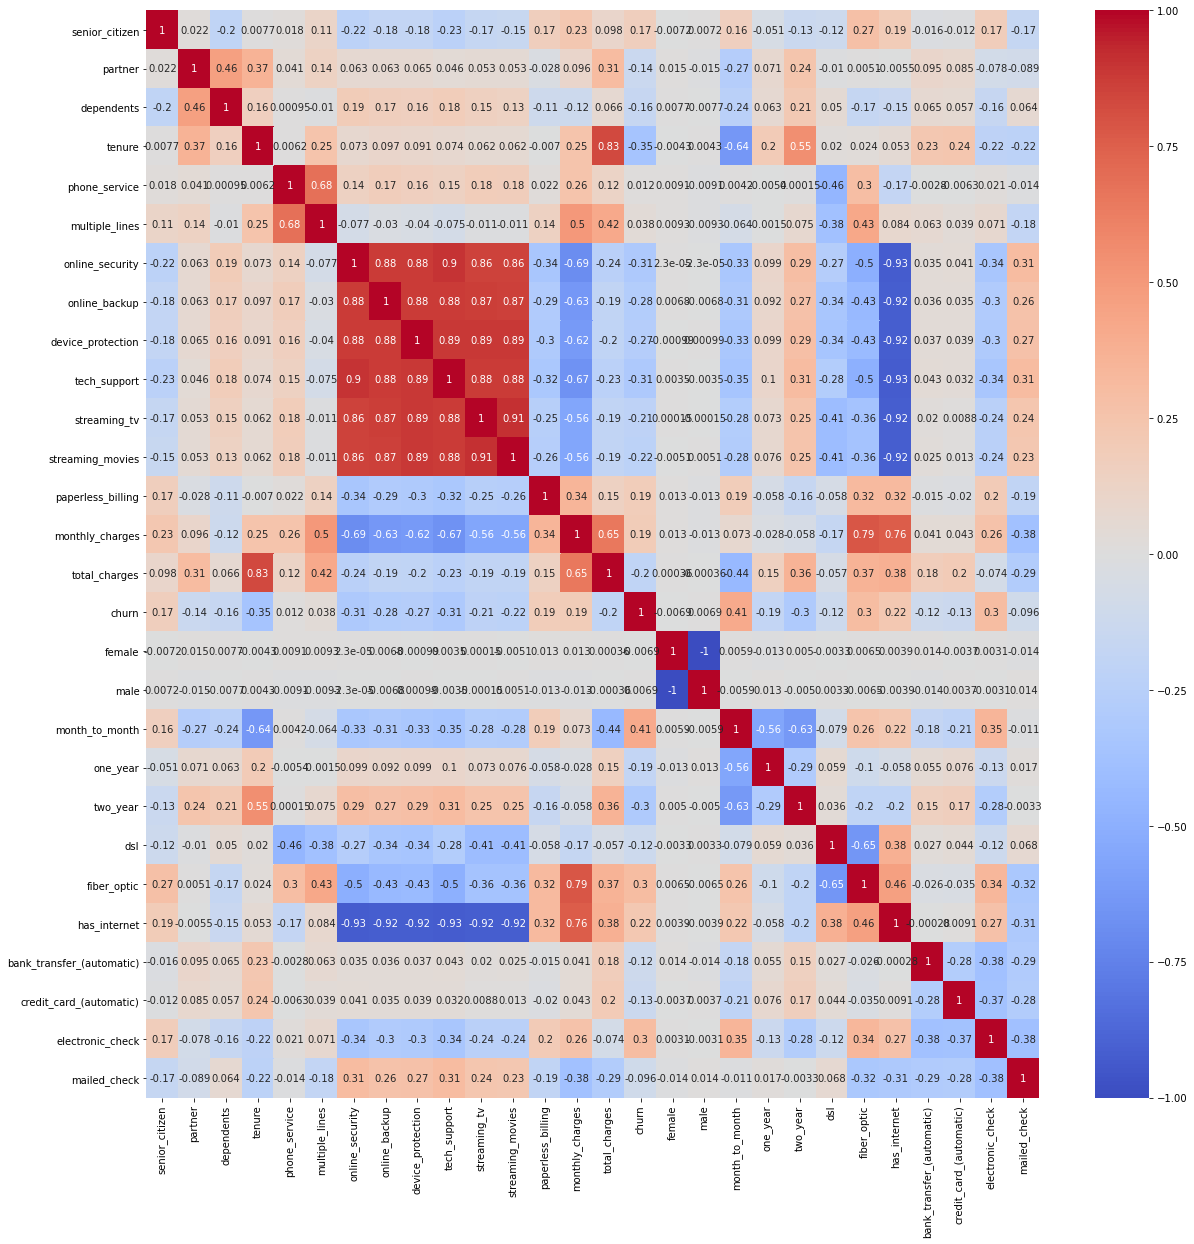

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr() , cmap='coolwarm', center=0, annot=True)

In [122]:
# I will select the columns to do the heat map
list(cols[cols < (-.2)].index)


['total_charges',
 'streaming_tv',
 'streaming_movies',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

In [123]:
list(cols[cols > .18].index)

['churn',
 'month_to_month',
 'fiber_optic',
 'electronic_check',
 'has_internet',
 'monthly_charges',
 'paperless_billing']

In [124]:
col_list = list(cols[cols > .18].index)  + list(cols[cols < (-.2)].index)

In [125]:
list(cols[cols < (-.2)].index)

['total_charges',
 'streaming_tv',
 'streaming_movies',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

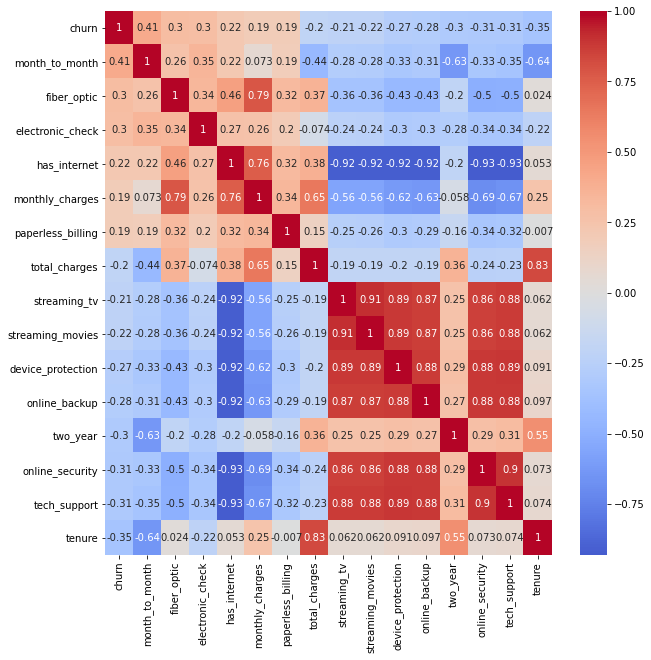

In [126]:
#
plt.figure(figsize=(10,10))
sns.heatmap(train[col_list].corr() , cmap='coolwarm', center=0, annot=True)

plt.title('')
plt.show()

## Takeaways
churn has positive correlation:
- month_to_month contracts
- internet type : fiber_optic
- payment type: electronic check

churn has negative  correlation:
- tenure
- tech_suport
- online_security


In [127]:
col_list = list(cols[cols > .20].index)  + list(cols[cols < (-.27)].index)

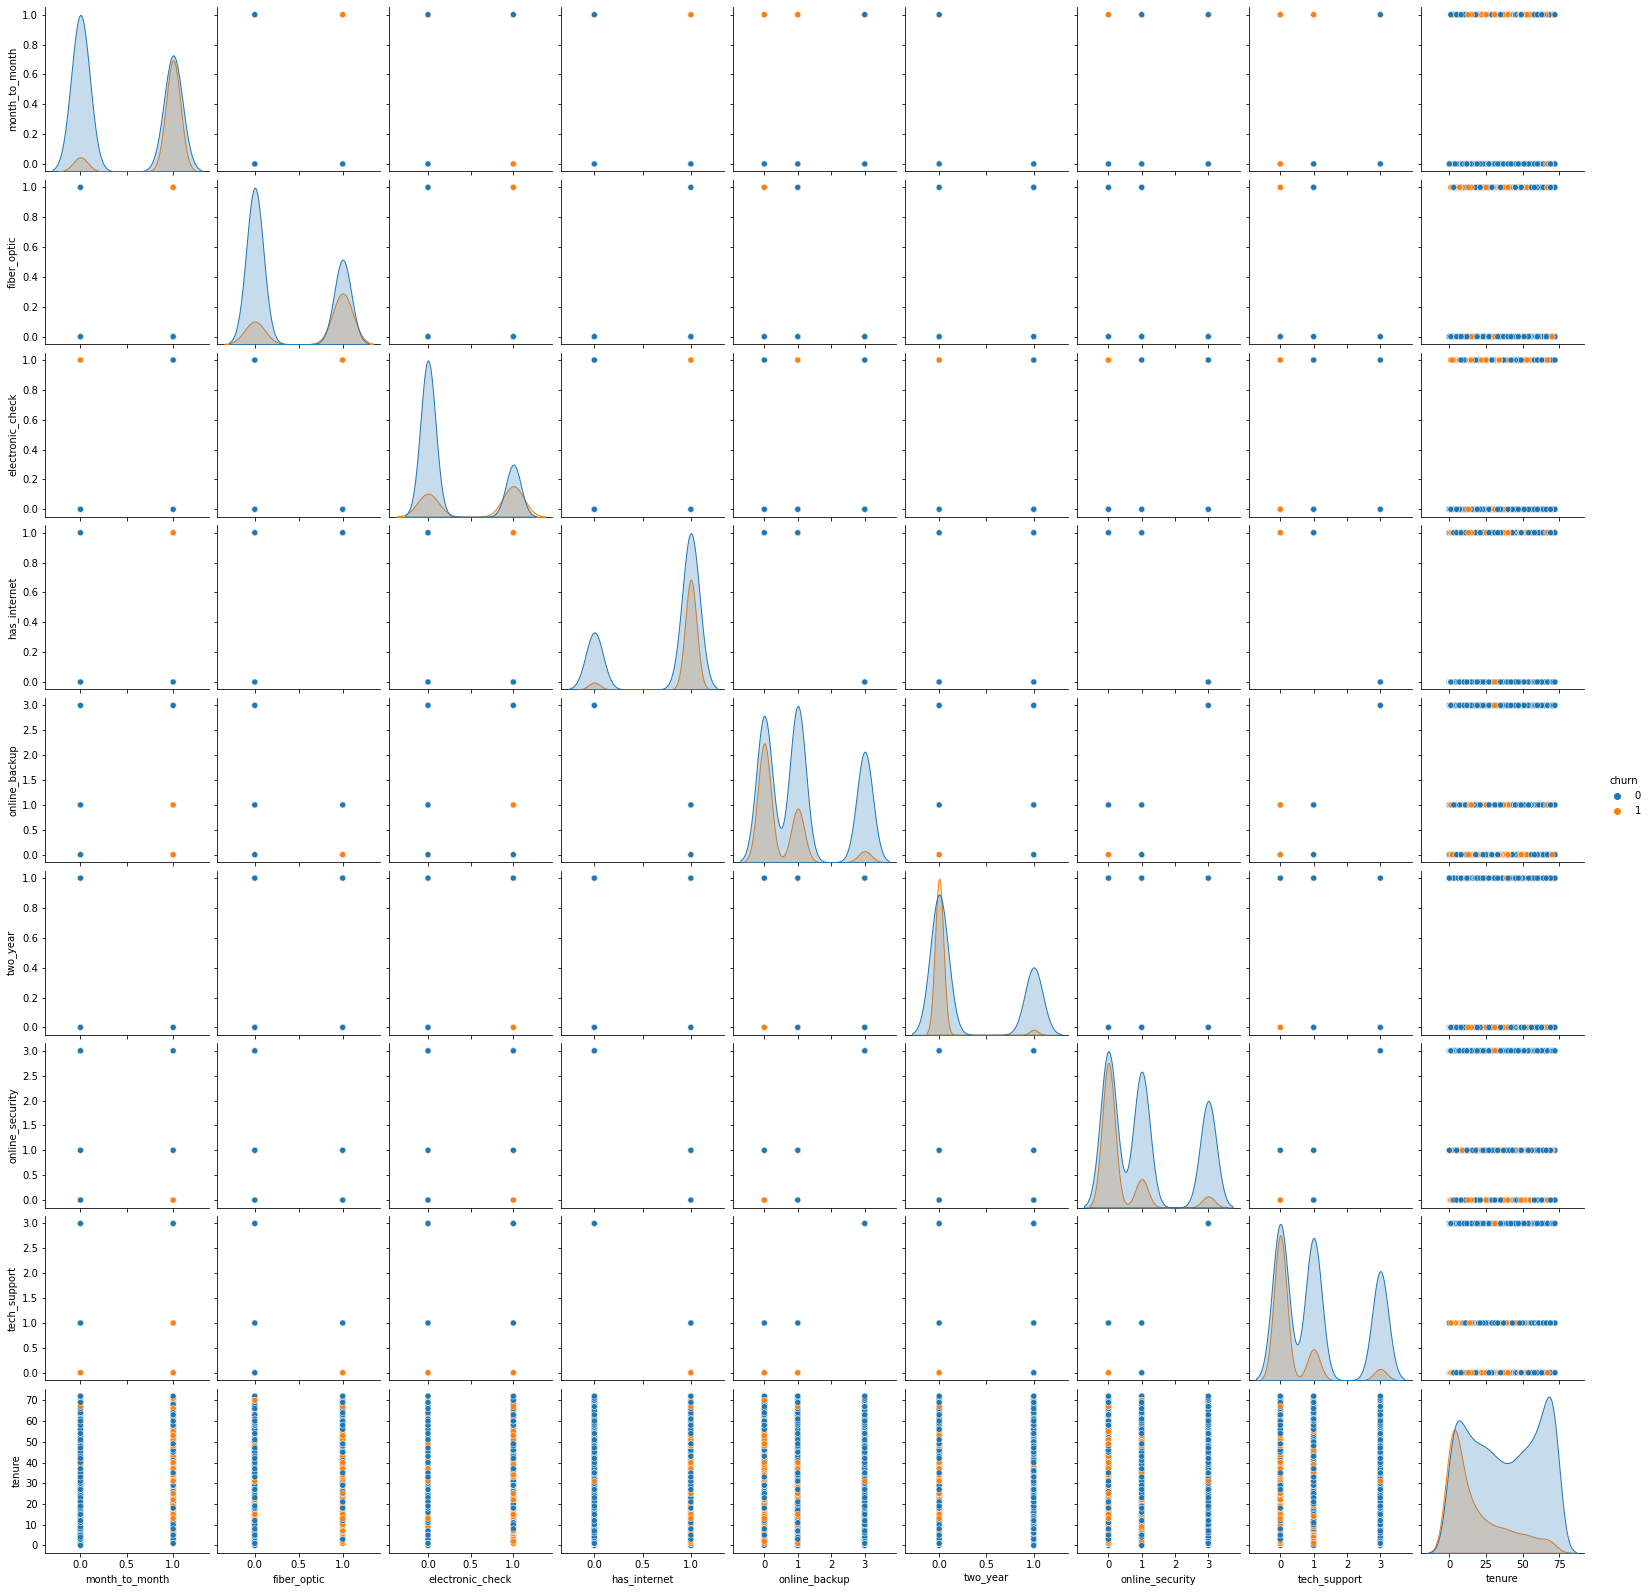

In [95]:
sns.pairplot(train[col_list], hue='churn')
plt.show()
## too much information 

In [96]:
# i willselect the 3 with positive & negative correlation 

In [97]:
col_list = list(cols[cols > .25].index)  + list(cols[cols < (-.25)].index)
col_list

['churn',
 'month_to_month',
 'fiber_optic',
 'electronic_check',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

In [98]:
exp_train = train[col_list]

In [99]:
exp_train.head()

,churn,month_to_month,fiber_optic,electronic_check,device_protection,online_backup,two_year,online_security,tech_support,tenure
5642,0,0,0,0,3,3,1,3,3,23
3338,0,0,1,0,1,0,0,0,0,27
4273,0,1,1,1,0,0,0,0,0,7
2382,0,1,0,0,0,1,0,0,0,47
2655,0,0,1,0,0,1,1,0,1,41


In [100]:
# Create melted df for viz
melted = exp_train.melt(id_vars=['churn'])

In [101]:
# Check out melted df info.
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35487 entries, 0 to 35486
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   churn     35487 non-null  int64 
 1   variable  35487 non-null  object
 2   value     35487 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 831.9+ KB


In [102]:
melted.head()

,churn,variable,value
0,0,month_to_month,0
1,0,month_to_month,0
2,0,month_to_month,1
3,0,month_to_month,1
4,0,month_to_month,0


In [103]:
# let's see the churn rate
churn_rate = train['churn'].mean()
churn_rate

0.2652802434694395

In [104]:
train['churn'].value_counts()

0    2897
1    1046
Name: churn, dtype: int64

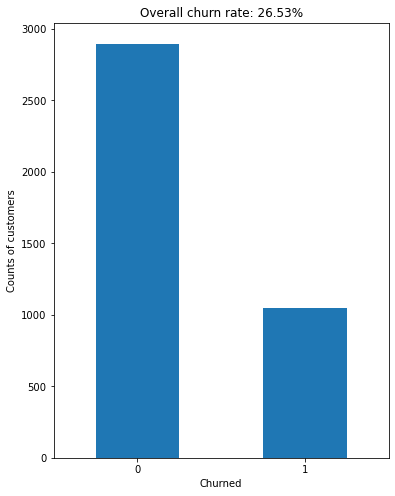

In [105]:
plt.figure(figsize=(6,8))
train.churn.value_counts().plot.bar(rot=0 )
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')
plt.ylabel('Counts of customers')

plt.show()

In [ ]:
#let check tenure

In [ ]:
plt.figure(figsize=(15,15))
# Distribution of Tenure
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple='stack'
             )

plt.title("Distribution of Tenure")
plt.xlabel('Tenure (in months)')

plt.xlim(0, train.tenure.max());

In [ ]:
plt.figure(figsize=(15,10))
# Distribution of Tenure
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple='stack',
             binwidth=1          
             )

plt.title("Distribution of Tenure")
plt.xlabel('Tenure (in months)')
plt.xlim(1, train.tenure.median())

In [ ]:
df[['monthly_charges','total_charges','tenure']][df['total_charges']== 0] # new customers

In [ ]:
train[['monthly_charges','total_charges','tenure']][train['tenure']== 1].head()

In [ ]:
#total of customer tenure = 1
ct1 = train.tenure[train['tenure']== 1].count()
ct1

In [ ]:
#customers tenure =1 and had canceled

In [ ]:
df_t1 = train[['monthly_charges','total_charges','tenure', 'churn']][(train['tenure']== 1)]

In [ ]:
can = df_t1.churn[ df_t1['churn'] == 1].count()
can

In [ ]:
print(f"churn rate in the first month of Tenure: {(can/ct1):.2%}")

TAKEAWAYS:
- cancelation is high  63.69 %in the fisrt month of tenure.  (they only made one payment)
- new customer  0 tenure, 


In [ ]:
exp_train.columns

In [ ]:
features = ['month_to_month', 'two_year', 'electronic_check','device_protection']


_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5, saturation=1)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='red')

Takeaways:
- month to month contracts have a significant higher churn rate
- two_year contracts have low churn rate
- customer who used electronic_check have a higher churn rate. this is not an autopay. ** we canc check the churn rate of the customerwith month_to_month contract an el;ectronic_check
- customers that have device protection tend to stay.


In [ ]:
features = ['fiber_optic', 'online_backup', 'online_security','tech_support']


_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5, saturation =1)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='red')

Takeaways
- customer that have the type of internet as fiber optic have a higher churn rate. we need to check the fiber optic service to see why the customer are leaving, if it is a problem with the service ? speed?  because we dont want to change our customersto dsl service 
-customer who have online_backup, online_security, tech_suppor have a lower churn of rate

In [ ]:
train.columns

In [ ]:
features = ['has_internet',  'paperless_billing']


_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5, saturation =1)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='red')

takeaways:
- customers with paperless_billing have a higher churn rate. we can offer all teh clients to suscribe to paperless to suscribe autopay at the same time with a discount.
- cutomer with internet have higher churn rste. (this also is the same as fiber_optic) here we can check if the mayority of customer have fiber_optic
    

#  statistical tests

In [ ]:
churn = cat 


**Tenure**  = cont
cont vs cat =  t_test


- $H_o$: There is no difference between churn and tenure
- $H_a$: There is a  difference between churn and tenure

Significance level $\alpha$ = 0.05

In [ ]:
alpha = 0.5
t, p = stats.ttest_1samp(train.tenure, train.churn.mean())

In [ ]:
t,p

In [ ]:

if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

In [ ]:

x = train['tenure']
y = train['churn']
plt.scatter(x,y)
plt.xlabel('Tenure')
plt.ylabel('churn')

**Fiber Optic** cat vs cat  = chi square


- $H_o$: Rate of churn is not dependent on Fiber Optic .
- $H_a$: Rate of churn is dependent on Fiber Optic status.


Significance level $\alpha$ = 0.05

In [ ]:
observed = pd.crosstab(train.fiber_optic, train.churn)
observed

In [ ]:
chi2, p, degf, expected =stats.chi2_contingency(observed)

In [ ]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('We reject the null Hypothesis')
else:
    print("we fail to reject the null")

**Electronic Check**  cat vs cat  = chi square

- $H_o$: Rate of churn is not dependent on using electronic check as the form of payment.
- $H_a$: Rate of churn is dependent on using electronic check as the form of payment.

Significance level  𝛼  = 0.05

In [ ]:
observed2 = pd.crosstab(train.electronic_check, train.churn)
observed2

In [ ]:
chi2, p, degf, expected =stats.chi2_contingency(observed2)

In [ ]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('We reject the null Hypothesis')
else:
    print("we fail to reject the null")

# MODEL

**Baseline** the most frequen value churn

In [106]:
#get the most frequen value.  0 = no churn
train.churn.value_counts().nlargest(1)

0    2897
Name: churn, dtype: int64

In [107]:
train['baseline']= 0

In [108]:
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check,baseline
5642,1982-FEBTD,0,1,1,23,1,2,3,3,3,...,0,1,0,0,0,0,1,0,0,0
3338,8982-NHAVY,0,0,0,27,1,2,0,0,1,...,1,0,0,1,1,1,0,0,0,0
4273,4115-NZRKS,1,0,0,7,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2382,9633-DENPU,0,1,0,47,1,1,0,1,0,...,0,0,1,0,1,1,0,0,0,0
2655,5693-PIPCS,0,0,0,41,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0


In [109]:
#accuracy
baseline_acc =(train.baseline == train.churn).mean()
baseline_acc

0.7347197565305605

In [110]:

print(f'The baseline accuracy for No Churn in all cases on the telco Dataset is {(train.baseline == train.churn).mean().mean():.3%}')

The baseline accuracy for No Churn in all cases on the telco Dataset is 73.472%


In [111]:

# remove baseline assumption from the train, we wont need this column anymore
train.drop(columns='baseline', inplace=True)

In [112]:

# split our X and y
# do the capital X, lowercase y thing for train test and split
# X is the data frame of the features, y is a series of the target
X_train = train.drop(columns='churn')
y_train = train[['churn']]
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

I am trying to predict the customers that will churn so  the positive variable will be churn = 1 in my folowing models.

Possible Outcomes:

- TP: Predict a customer churn  and it is a customer churn
- TN: Predict  no customer churn  and it is no customer churn
- FP: Predict a customer churn but it is not a customer churn
- FN: Predict no customer churn but it is a customer churn

In [128]:
#col_list have the lsit of columns with the highest correlation 
#here I' removing churn from this list
columns = col_list[1:] 
columns


['month_to_month',
 'fiber_optic',
 'electronic_check',
 'has_internet',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

In [129]:
cols

churn                        1.000000
month_to_month               0.409166
fiber_optic                  0.303591
electronic_check             0.298034
has_internet                 0.223698
monthly_charges              0.189040
paperless_billing            0.187409
senior_citizen               0.165482
multiple_lines               0.037585
phone_service                0.011995
male                         0.006885
female                      -0.006885
mailed_check                -0.095605
bank_transfer_(automatic)   -0.116189
dsl                         -0.124500
credit_card_(automatic)     -0.127042
partner                     -0.137696
dependents                  -0.160315
one_year                    -0.185215
total_charges               -0.201972
streaming_tv                -0.214859
streaming_movies            -0.219114
device_protection           -0.269440
online_backup               -0.275924
two_year                    -0.298877
online_security             -0.307907
tech_support

## model 1

-  decision tree


In [130]:
# create the model
model_dtl= DecisionTreeClassifier(max_depth=3)

In [133]:
# fit the model
model_dtl.fit(X_train[columns], y_train)

DecisionTreeClassifier(max_depth=3)

In [135]:
# look at the model scores for training set and validate set
print(f'training score: {model_dtl.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_dtl.score(X_validate[columns], y_validate):.2%}')

training score: 79.20%
validate score: 79.36%


In [138]:
##### create the model
model_dt2 = DecisionTreeClassifier(max_depth=4 , max_features = 6, random_state=123)
# fit the model
model_dt2.fit(X_train[columns], y_train)

DecisionTreeClassifier(max_depth=4, max_features=6, random_state=123)

In [139]:
# look at the model scores for training set and validate set
print(f'training score: {model_dt2.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_dt2.score(X_validate[columns], y_validate):.2%}')

training score: 79.43%
validate score: 78.59%


In [140]:
import model_func as mf

model_dt1 

In [142]:
mf.compare (model_dtl, model_dt2, X_train[columns],y_train)


    ******       Model 1  ******                                ******     Model 2  ****** 
    The accuracy for our model 1 is 79.2037%            |   The accuracy for our model 2 is 79.4319%  
                                                        |
    The True Positive Rate is 36.902%                   |   The True Positive Rate is 43.308%  
    The False Positive Rate is 5.523%                  |   The False Positive Rate is 7.525% 
    The True Negative Rate is 94.477%                   |   The True Negative Rate is 92.475% 
    The False Negative Rate is 63.098%                  |   The False Negative Rate is 56.692%

    _____________________________________________________________________________________________________________
    

    The positive is  'survived'

    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 2737,False positive: 160
actual_survived,False Negative: 660,True Positive: 386
,pred_dead,pred_survived
actual_dead,True Negative: 2679,False positive: 218
actual_survived,False Negative: 593,True Positive: 453




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.805711,0.944770,0.869717,2897.000000
survived,0.706960,0.369025,0.484925,1046.000000
accuracy,0.792037,0.792037,0.792037,0.792037
macro avg,0.756335,0.656898,0.677321,3943.000000
weighted avg,0.779514,0.792037,0.767639,3943.000000
,precision,recall,f1-score,support
dead,0.818765,0.924750,0.868536,2897.000000
survived,0.675112,0.433078,0.527665,1046.000000
accuracy,0.794319,0.794319,0.794319,0.794319
macro avg,0.746939,0.678914,0.698100,3943.000000


## Random Forest

In [ ]:
# create the Random Forest Model
model_rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=1349)
# fit the thing
model_rf1.fit(X_train[columns], y_train)

In [ ]:
# look at the model scores for training set and validate set
print(f'training score: {model_rf1.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_rf1.score(X_validate[columns], y_validate):.2%}')

In [ ]:
# create the Random Forest Model
model_rf2 = RandomForestClassifier(min_samples_leaf=4, max_depth=4, random_state=1349)
# fit the thing
model_rf2.fit(X_train[columns], y_train)

In [ ]:
# look at the model scores for training set and validate set
print(f'training score: {model_rf2.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_rf2.score(X_validate[columns], y_validate):.2%}')

In [ ]:
model_rf2

## KNN

In [ ]:
for k in range(10, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[columns], y_train)
    acc_t = knn.score(X_train[columns], y_train)
    acc_v = knn.score(X_validate[columns], y_validate )
    if (acc_t - acc_v)< .05 :
        print(f'Model: {k} when k is {k}')
        print(f'training score: {knn.score(X_train[columns], y_train):.2%}')
        print(f'validate score: {knn.score(X_validate[columns], y_validate):.2%}')
        print('__________________________________________________________')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train[columns], y_train)
print(f'training score: {knn.score(X_train[columns], y_train):.2%}')
print(f'validate score: {knn.score(X_validate[columns], y_validate):.2%}')

## Logistic Regression

In [ ]:

model_lr1 =LogisticRegression(C=1.0 , random_state=123)
model_lr1.fit(X_train[columns], y_train)

In [ ]:
print(f'training score: {model_lr1.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_lr1.score(X_validate[columns], y_validate):.2%}')

In [ ]:

model_lr2 =LogisticRegression(C=.1, random_state = 123, multi_class =  'multinomial')
model_lr2.fit(X_train[columns], y_train)

In [ ]:
print(f'training score: {model_lr2.score(X_train[columns], y_train):.2%}')
print(f'validate score: {model_lr2.score(X_validate[columns], y_validate):.2%}')

model_lr1

lest compare  model_lr1 with model_rf2

In [50]:
import model_func as mf

In [51]:
mf.compare(model_lr1, model_rf2, X_validate[columns], y_validate)

NameError: name 'model_lr1' is not defined

I will select model_lr1

## test

In [ ]:
mf.model_performs(X_test[columns], y_test, model_lr1)

In [ ]:
#recall
rec_model1= recall_score(y_test, val_pred, pos_label = 1 )
rec_model1